In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

In [25]:
train = pd.read_csv('Univariate-Train.csv')
test = pd.read_csv('Univariate-Test.csv')

In [26]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,7.170301,1,1,"Ksfc Layout,Bangalore",12.969910,4.351541,4.007333
1,Dealer,0,0,2,BHK,7.150701,1,1,"Vishweshwara Nagar,Mysore",12.274538,4.339179,3.931826
2,Owner,0,0,2,BHK,6.838576,1,1,"Jigani,Bangalore",12.778033,4.351982,3.761200
3,Owner,0,1,2,BHK,6.835100,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,4.348269,4.135167
4,Owner,0,0,3,BHK,7.130899,1,1,"South Chittoor,Kochi",10.033280,4.334444,3.737670


In [27]:
test.head()

,Unnamed: 0,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,0,Owner,0,0,1,BHK,6.301100,1,1,"Kamrej,Surat",21.262000,4.291113
1,1,Dealer,1,1,2,BHK,6.684612,0,0,"Panvel,Lalitpur",18.966114,4.292489
2,2,Dealer,0,0,2,BHK,7.136560,1,1,"New Town,Kolkata",22.592200,4.482832
3,3,Dealer,0,0,3,BHK,7.244463,1,1,"Kalwar Road,Jaipur",26.988300,4.325253
4,4,Owner,0,0,1,BHK,6.064896,1,1,"Mai Mandir,Nadiad",22.700000,4.288677


In [28]:
for df in [train,test]:
    df['CITY'] = df['ADDRESS'].map(lambda x : x.split(',')[-1])

In [29]:
pd.options.display.max_rows =None

In [31]:
plt.figure(figsize=(16,6))
train['CITY'].value_counts()[train['CITY'].value_counts() <= 150].sum()*100/train.shape[0]

14.88892213329344

<Figure size 1152x432 with 0 Axes>

* Only grater than 150 city will have impact , other will be considered as Town

In [53]:
main_city = train['CITY'].value_counts()[train['CITY'].value_counts() > 0 ].index.values

In [33]:
df['CITY'].map(lambda x : x if x in main_city else 'Town' )

0                Surat
1             Lalitpur
2              Kolkata
3               Jaipur
4                 Town
5             Vadodara
6          Maharashtra
7               Mumbai
8          Maharashtra
9             Lalitpur
10             Lucknow
11        Secunderabad
12             Jodhpur
13           Faridabad
14           Faridabad
15           Bangalore
16               Noida
17             Kolkata
18           Bangalore
19            Lalitpur
20           Bangalore
21              Guntur
22          Chandigarh
23             Lucknow
24              Kanpur
25                Agra
26                Pune
27            Vadodara
28             Kolkata
29               Noida
30              Mohali
31             Lucknow
32              Kannur
33                Pune
34           Bangalore
35          Chandigarh
36                Town
37                Pune
38           Bangalore
39              Jaipur
40           Bangalore
41             Gurgaon
42           Faridabad
43         

In [54]:
for df in [train,test]:
    df['CITY_2'] = df['CITY'].map(lambda x : x if x in main_city else 'Town' )

In [55]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,CITY_2
0,Owner,0,0,2,BHK,7.170301,1,1,"Ksfc Layout,Bangalore",12.969910,4.351541,4.007333,Bangalore,Bangalore
1,Dealer,0,0,2,BHK,7.150701,1,1,"Vishweshwara Nagar,Mysore",12.274538,4.339179,3.931826,Mysore,Mysore
2,Owner,0,0,2,BHK,6.838576,1,1,"Jigani,Bangalore",12.778033,4.351982,3.761200,Bangalore,Bangalore
3,Owner,0,1,2,BHK,6.835100,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,4.348269,4.135167,Ghaziabad,Ghaziabad
4,Owner,0,0,3,BHK,7.130899,1,1,"South Chittoor,Kochi",10.033280,4.334444,3.737670,Kochi,Kochi


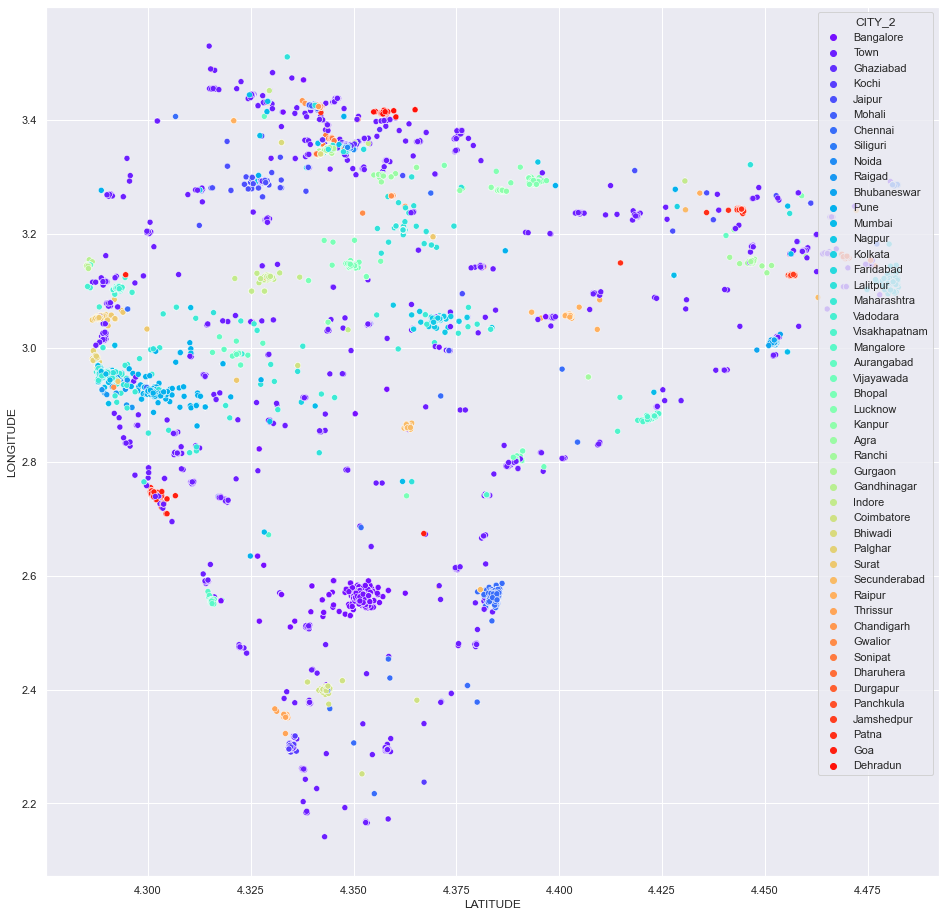

In [110]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=train['LATITUDE'],y=np.log(train['LONGITUDE']),hue=train['CITY_2'],palette='rainbow')

[Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Town'),
 Text(0, 0, 'Ghaziabad'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Mohali'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Siliguri'),
 Text(0, 0, 'Noida'),
 Text(0, 0, 'Raigad'),
 Text(0, 0, 'Bhubaneswar'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Nagpur'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Faridabad'),
 Text(0, 0, 'Lalitpur'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Vadodara'),
 Text(0, 0, 'Visakhapatnam'),
 Text(0, 0, 'Mangalore'),
 Text(0, 0, 'Aurangabad'),
 Text(0, 0, 'Vijayawada'),
 Text(0, 0, 'Bhopal'),
 Text(0, 0, 'Lucknow'),
 Text(0, 0, 'Kanpur'),
 Text(0, 0, 'Agra'),
 Text(0, 0, 'Ranchi'),
 Text(0, 0, 'Gurgaon'),
 Text(0, 0, 'Gandhinagar'),
 Text(0, 0, 'Indore'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Bhiwadi'),
 Text(0, 0, 'Palghar'),
 Text(0, 0, 'Surat'),
 Text(0, 0, 'Secunderabad'),
 Text(0, 0, 'Raipur'),
 Text(0, 0, 'Thrissur'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Gwalior'),
 Text(0, 0, 'Sonip

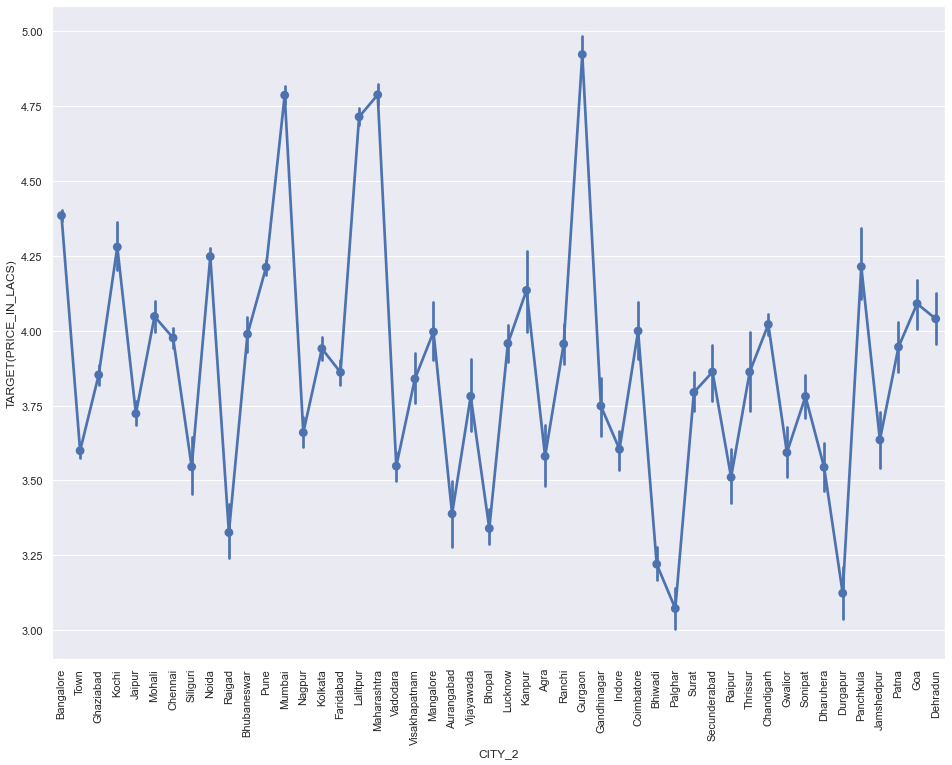

In [11]:
plt.figure(figsize=(16,12))
fig = sns.pointplot(x=train['CITY_2'],y=train['TARGET(PRICE_IN_LACS)'],)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)

In [36]:
test['CITY_2'].value_counts()

Bangalore        10001
Lalitpur          7070
Pune              4600
Mumbai            4516
Kolkata           4141
Noida             4059
Maharashtra       3679
Chennai           2881
Ghaziabad         2517
Jaipur            2267
Town              1501
Chandigarh        1490
Faridabad         1478
Vadodara          1343
Mohali            1326
Surat             1026
Gurgaon            950
Lucknow            847
Nagpur             799
Indore             662
Kochi              521
Bhubaneswar        461
Bhopal             458
Bhiwadi            437
Goa                424
Visakhapatnam      386
Coimbatore         353
Secunderabad       300
Mangalore          272
Gandhinagar        265
Dehradun           245
Ranchi             240
Patna              240
Kanpur             237
Sonipat            235
Palghar            234
Panchkula          221
Vijayawada         201
Aurangabad         188
Jamshedpur         186
Raipur             183
Siliguri           176
Agra               157
Meerut     

In [56]:
train['CITY_2'].value_counts().shape

(231,)

#### Trying Clustering on longitude and latitude

In [57]:
from sklearn.cluster import KMeans,SpectralClustering,AffinityPropagation

In [198]:
for df in [train,test]:
    df['LONGITUDE'] = np.log(df['LONGITUDE'])

In [58]:
t1 = train.copy()

In [59]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,CITY_2
0,Owner,0,0,2,BHK,7.170301,1,1,"Ksfc Layout,Bangalore",12.969910,4.351541,4.007333,Bangalore,Bangalore
1,Dealer,0,0,2,BHK,7.150701,1,1,"Vishweshwara Nagar,Mysore",12.274538,4.339179,3.931826,Mysore,Mysore
2,Owner,0,0,2,BHK,6.838576,1,1,"Jigani,Bangalore",12.778033,4.351982,3.761200,Bangalore,Bangalore
3,Owner,0,1,2,BHK,6.835100,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,4.348269,4.135167,Ghaziabad,Ghaziabad
4,Owner,0,0,3,BHK,7.130899,1,1,"South Chittoor,Kochi",10.033280,4.334444,3.737670,Kochi,Kochi


In [60]:
'''# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
wcss = []
cl_num = 18
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(t1[['LONGITUDE','LATITUDE']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)'''

"# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.\n# Note that 'range' doesn't include the upper boundery\nwcss = []\ncl_num = 18\nfor i in range (1,cl_num):\n    kmeans= KMeans(i)\n    kmeans.fit(t1[['LONGITUDE','LATITUDE']])\n    wcss_iter = kmeans.inertia_\n    wcss.append(wcss_iter)"

In [61]:
'''fig
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')'''

"fig\nnumber_clusters = range(1,cl_num)\nplt.plot(number_clusters, wcss)\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('Within-cluster Sum of Squares')"

In [62]:
cls = KMeans(9)
cls.fit(t1[['LONGITUDE','LATITUDE']])

KMeans(n_clusters=9)

In [63]:
t1['ZONE']= cls.predict(t1[['LONGITUDE','LATITUDE']])

In [64]:
test['LATITUDE'].median(),test['LONGITUDE'].median()


(4.348072926465658, 20.933259999999997)

In [65]:
test['LATITUDE'] = test['LATITUDE'].fillna(4.348072926465658)

In [66]:
test['LONGITUDE'] = test['LONGITUDE'].fillna(3.041605565185934)

In [67]:
test['ZONE']= cls.predict(test[['LONGITUDE','LATITUDE']])

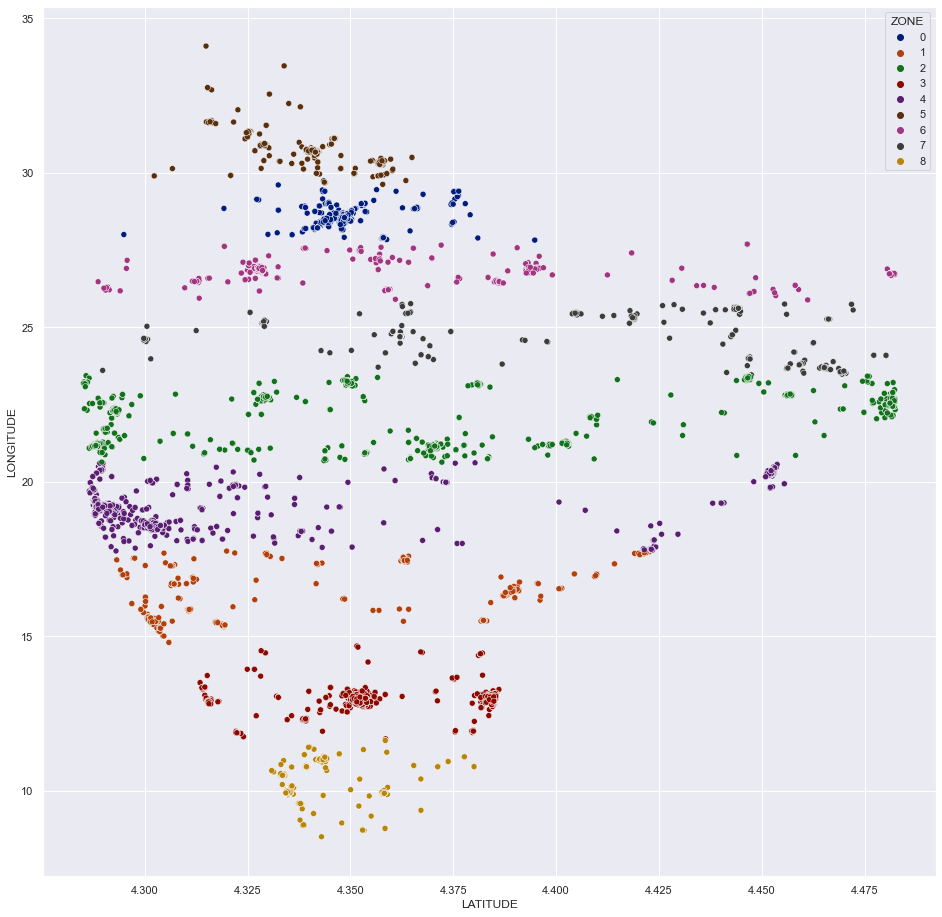

In [68]:
plt.figure(figsize=(16,16))
sns.scatterplot(x=t1['LATITUDE'],y=t1['LONGITUDE'],hue=t1['ZONE'],palette='dark')

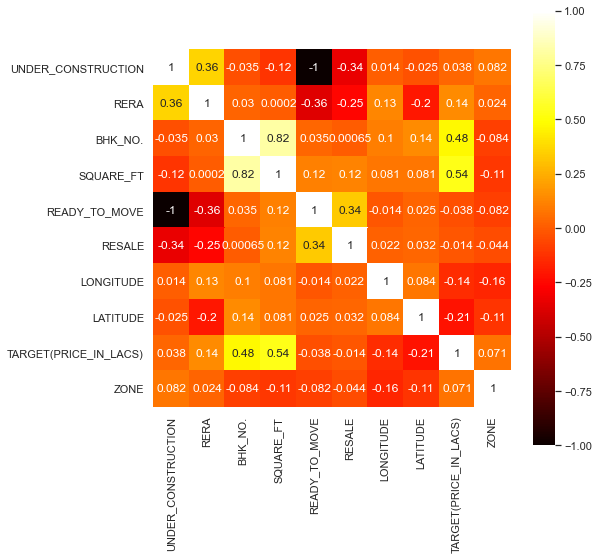

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(t1.corr(),square=True,annot=True,cmap='hot')

* Using KMeans<br />
9 --> -0.34 <br />
7 --> -0.19<br />
6 --> -0.023<br />
5 --> 0.19<br />
4 --> 0.053<br />

In [70]:
t1.to_csv('Fina_Train-2.csv',index=False)
test.to_csv('Fina_Test-2.csv',index=False)

In [71]:
train.shape[0]

26738

In [224]:
fold = 5
((26738-(26738/fold)*(fold-1)))/26738

0.19999999999999996

In [217]:
24064.2-26738

-2673.7999999999993

In [218]:
2673.7999999999993/26738

0.09999999999999998